# Model Building


##          Model Training


In [2]:
import numpy as np
import pandas as pd
import joblib


dataset = pd.read_excel('../data/raw/E Commerce Dataset.xlsx', sheet_name='E Comm')
dataset_copy = dataset.copy()
dataset.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
dataset.isnull().sum()
dataset.dropna(inplace=True)


In [4]:
dataset.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.00000,3774.000000,3774.000000,3774.000000,3774.000000
mean,53017.994966,0.167197,8.776895,1.707737,15.743773,2.981187,3.754107,3.056439,4.216481,0.282194,15.72761,1.719661,2.825384,4.526232,164.213590
std,1608.979289,0.373201,7.678508,0.936725,8.594330,0.722158,1.025233,1.389730,2.562142,0.450127,3.62991,1.674508,2.467597,3.371310,24.093966
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.00000,0.000000,1.000000,0.000000,0.000000
25%,51656.250000,0.000000,1.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.00000,1.000000,1.000000,2.000000,148.485000
50%,53160.500000,0.000000,8.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.00000,1.000000,2.000000,3.000000,160.050000
75%,54394.500000,0.000000,13.000000,3.000000,21.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.00000,2.000000,3.000000,7.000000,178.010000
max,55630.000000,1.000000,51.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.00000,16.000000,16.000000,46.000000,324.990000


### Splitting Data

In [5]:
from sklearn.model_selection import train_test_split
y = dataset.loc[:, dataset.columns == 'Churn']
X = dataset.loc[:, dataset.columns != 'Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Features Engineering

In [6]:
numerical_features = [
    'Tenure',
    'WarehouseToHome',
    'HourSpendOnApp',
    'NumberOfDeviceRegistered',
    'NumberOfAddress',
    'OrderAmountHikeFromlastYear',
    'CouponUsed',
    'OrderCount',
    'DaySinceLastOrder',
    'CashbackAmount'
]
categorical_features = [
    'CityTier',  
    'PreferredLoginDevice',
    'Gender',
    'PreferredPaymentMode',
]

train_data = pd.concat([X_train[numerical_features], y_train], axis=1)
correlation_matrix = train_data.corr()
correlation_matrix



,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
Tenure,1.000000,-0.030664,-0.031842,-0.075820,0.194447,0.006105,0.063740,0.114764,0.118036,0.228303,-0.345251
WarehouseToHome,-0.030664,1.000000,0.051587,0.026636,-0.002404,0.026527,-0.015548,-0.000094,0.008336,-0.021507,0.084287
HourSpendOnApp,-0.031842,0.051587,1.000000,0.287155,0.112641,0.102124,0.169655,0.097763,0.012808,0.113148,0.055839
NumberOfDeviceRegistered,-0.075820,0.026636,0.287155,1.000000,0.067121,0.074921,0.115839,0.070921,-0.047759,0.109774,0.164453
NumberOfAddress,0.194447,-0.002404,0.112641,0.067121,1.000000,0.011658,-0.010786,-0.073401,-0.140428,0.088985,0.065600
OrderAmountHikeFromlastYear,0.006105,0.026527,0.102124,0.074921,0.011658,1.000000,0.038004,0.030911,0.010249,0.020614,0.025369
CouponUsed,0.063740,-0.015548,0.169655,0.115839,-0.010786,0.038004,1.000000,0.731508,0.304520,0.177992,0.017949
OrderCount,0.114764,-0.000094,0.097763,0.070921,-0.073401,0.030911,0.731508,1.000000,0.450637,0.233157,0.005771
DaySinceLastOrder,0.118036,0.008336,0.012808,-0.047759,-0.140428,0.010249,0.304520,0.450637,1.000000,0.241228,-0.131059
CashbackAmount,0.228303,-0.021507,0.113148,0.109774,0.088985,0.020614,0.177992,0.233157,0.241228,1.000000,-0.070590


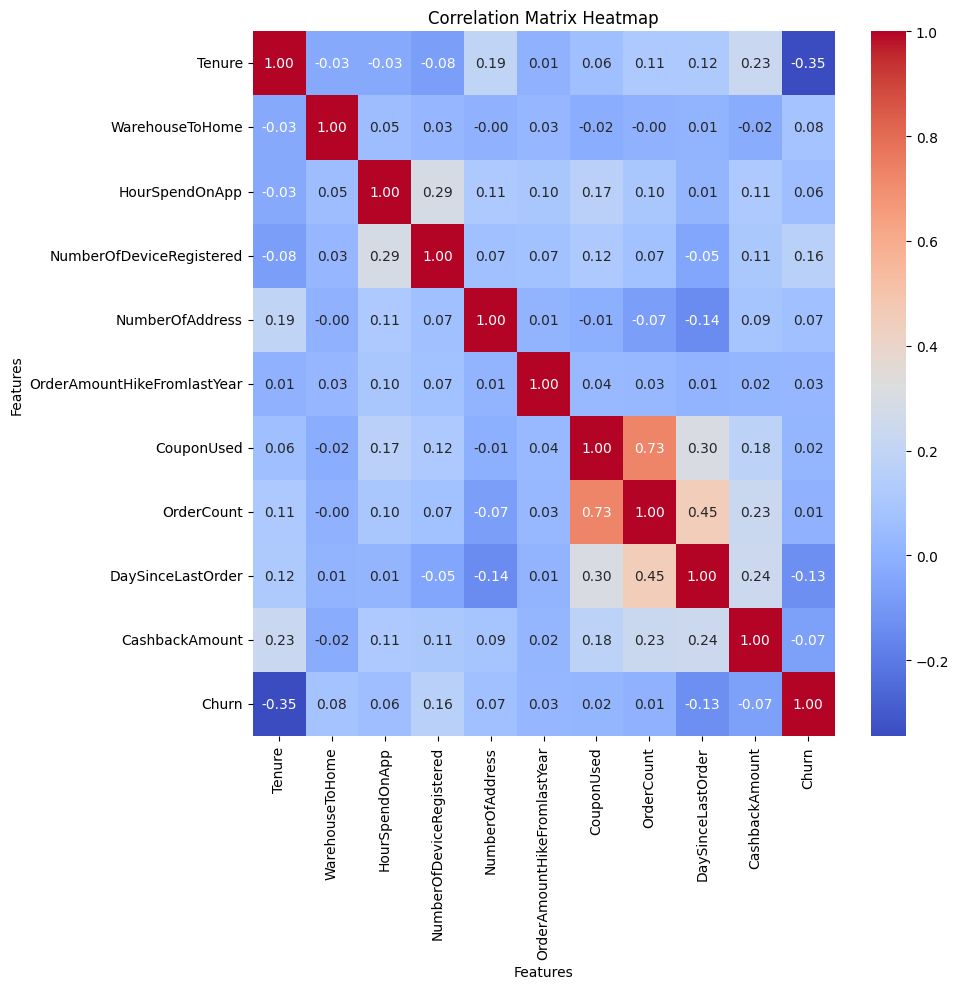

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

plt.tight_layout()

plt.show()

Tenure: Strong negative correlation with churn; longer tenure likely reduces churn risk.

CashbackAmount: Negative correlation with churn; more cashback might improve customer retention.

OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder: These features have a positive but not very strong correlation with churn; they indicate that changes in ordering behavior and engagement might influence churn.

WarehouseToHome, HourSpendOnApp, NumberOfDeviceRegistered: These features show very low correlation with churn; they might not be significant predictors on their own.

CouponUsed and OrderCount: These two features are highly correlated with each other, indicating a possible relationship between the frequency of orders and coupon usage.

In [8]:
important_numerical_features = [
    'Tenure',
    'CashbackAmount',
    'OrderAmountHikeFromlastYear',
    'CouponUsed',
    'DaySinceLastOrder'
    # 'OrderCount' is excluded due to its high correlation with 'CouponUsed'
]

important_categorical_features = [
    'CityTier',
    'PreferredLoginDevice'
]


In [9]:
X_train_selected = X_train[important_numerical_features + important_categorical_features]
X_test_selected = X_test[important_numerical_features + important_categorical_features]


### Scaling Numerical Features


In [10]:
from sklearn.preprocessing import StandardScaler

def scaling_Numerical_features(data, is_train, scaler=None):
    
    data = data[important_numerical_features]
    
    if is_train:
        scaler = StandardScaler()
        scaler.fit(data)
        scaled_data = scaler.transform(data)

    else:
        if scaler is None:
            raise ValueError("A fitted scaler must be provided for scaling test data.")
        scaled_data = scaler.transform(data)
        
    scaled_data = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)


    return scaled_data, scaler

X_train_scaled, scaler = scaling_Numerical_features(X_train_selected, is_train=True, scaler=None)
joblib.dump(scaler, '../models/scaler.joblib')

X_train_scaled.head()

,Tenure,CashbackAmount,OrderAmountHikeFromlastYear,CouponUsed,DaySinceLastOrder
965,-0.869139,1.356418,-0.756333,-1.036203,0.734116
2090,2.494046,-0.019394,-0.480863,0.175611,0.734116
5167,-0.998492,1.496065,-0.756333,1.993331,1.029111
1321,-0.222373,0.115708,1.447425,-0.430296,0.734116
4555,1.071160,-0.691600,1.447425,0.175611,-0.445864


# Encoding Categorical Features

In [11]:
from sklearn.preprocessing import OneHotEncoder

def encode_categorical_features(data,is_train,encoder=None):
    data = data[important_categorical_features]
    if is_train:
        encoder = OneHotEncoder()
        data_encoded = encoder.fit_transform(data)
    
    else:
        if encoder is None:
            raise ValueError("A fitted encoder must be provided for encoding test data.")
        data_encoded = encoder.transform(data)
        
    data_encoded = pd.DataFrame(data_encoded.toarray(), index=data.index, columns=encoder.get_feature_names_out())
        
    return data_encoded,encoder

X_train_encoded,encoder = encode_categorical_features(X_train, is_train=True, encoder=None)
joblib.dump(encoder, '../models/encoder.joblib')


X_train_encoded.head()

,CityTier_1,CityTier_2,CityTier_3,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone
965,1.0,0.0,0.0,0.0,1.0,0.0
2090,1.0,0.0,0.0,1.0,0.0,0.0
5167,1.0,0.0,0.0,1.0,0.0,0.0
1321,0.0,0.0,1.0,0.0,1.0,0.0
4555,1.0,0.0,0.0,1.0,0.0,0.0


# Preprocessing data (Scaling + Encoding)

In [12]:
def preprocess(data, is_train, scaler=None, encoder=None):
    if is_train:
        # For the training data, fit and transform
        scaled_data, scaler = scaling_Numerical_features(data, is_train=True, scaler=None)
        encoded_data, encoder = encode_categorical_features(data, is_train=True, encoder=None)
    else:
        # For the testing data, only transform using the already fitted scaler and encoder
        scaled_data, _ = scaling_Numerical_features(data, is_train=False, scaler=scaler)
        encoded_data, _ = encode_categorical_features(data, is_train=False, encoder=encoder)
    
    # Combine scaled and encoded features
    preprocessed_data = pd.concat([scaled_data, encoded_data], axis=1)
    return preprocessed_data, scaler, encoder


X_train_preprocessed,scaler,encoder = preprocess(X_train, is_train = True, scaler=None, encoder=None)
X_train_preprocessed.head()



,Tenure,CashbackAmount,OrderAmountHikeFromlastYear,CouponUsed,DaySinceLastOrder,CityTier_1,CityTier_2,CityTier_3,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone
965,-0.869139,1.356418,-0.756333,-1.036203,0.734116,1.0,0.0,0.0,0.0,1.0,0.0
2090,2.494046,-0.019394,-0.480863,0.175611,0.734116,1.0,0.0,0.0,1.0,0.0,0.0
5167,-0.998492,1.496065,-0.756333,1.993331,1.029111,1.0,0.0,0.0,1.0,0.0,0.0
1321,-0.222373,0.115708,1.447425,-0.430296,0.734116,0.0,0.0,1.0,0.0,1.0,0.0
4555,1.071160,-0.691600,1.447425,0.175611,-0.445864,1.0,0.0,0.0,1.0,0.0,0.0


### Model Training 

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

def perform_grid_search(X_train, y_train, model, parameters, model_name):
    grid_search = GridSearchCV(estimator=model,
                               param_grid=parameters,
                               scoring='accuracy', 
                               cv=5)  
    
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best score for {model_name}: {grid_search.best_score_}")

    return best_model

logistic_params = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

random_forest_params = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

model_lr = perform_grid_search(X_train_preprocessed, y_train, LogisticRegression(solver='liblinear'), logistic_params, 'LogisticRegression')
model_rf = perform_grid_search(X_train_preprocessed, y_train, RandomForestClassifier(), random_forest_params, 'RandomForest')
model_svm = perform_grid_search(X_train_preprocessed, y_train, SVC(), svm_params, 'SVM')

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConve

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConve

Best parameters for LogisticRegression: {'C': 1, 'penalty': 'l2'}
Best score for LogisticRegression: 0.8320675870097635


c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionW

Best parameters for RandomForest: {'max_depth': 20, 'n_estimators': 200}
Best score for RandomForest: 0.9175238597300475


c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConve

Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Best score for SVM: 0.864197774922298


the above results are on the trained dataset, all of them are high, then we don't have underfitting problem
Random Forest performed the best
Now let's try to evalute the models on unseen data "test set"

## Model Evaluation

### Scaling Numerical Features 

In [14]:
X_test_preprocessed,_,_ = preprocess(X_test, is_train = False, scaler=scaler, encoder=encoder)

X_test_preprocessed.shape


(755, 11)

### Evaluation

In [15]:
from sklearn.metrics import accuracy_score

predictions_lr = model_lr.predict(X_test_preprocessed)
predictions_rf = model_rf.predict(X_test_preprocessed)
predictions_svm = model_svm.predict(X_test_preprocessed)

accuracy_lr = accuracy_score(y_test, predictions_lr)
accuracy_rf = accuracy_score(y_test, predictions_rf)
accuracy_svm = accuracy_score(y_test, predictions_svm)

print(f"Test Accuracy for Logistic Regression: {accuracy_lr}")
print(f"Test Accuracy for Random Forest: {accuracy_rf}")
print(f"Test Accuracy for SVM: {accuracy_svm}")

Test Accuracy for Logistic Regression: 0.8741721854304636
Test Accuracy for Random Forest: 0.9562913907284768
Test Accuracy for SVM: 0.8913907284768212


### Random Forest Achieve the best score, so we will use it (no overfitting problem recorded)

In [16]:
joblib.dump(model_rf, '../models/random_forest_model.joblib')


predictions = model_rf.predict(X_test_preprocessed)

# Model Inference

In [17]:
dataset = pd.read_excel('../data/raw/E Commerce Dataset.xlsx', sheet_name='E Comm')

Scaler = joblib.load('../models/scaler.joblib')
Encoder = joblib.load('../models/encoder.joblib')


Preprocessed_Test,_,_ = preprocess(dataset, is_train=False, scaler=Scaler, encoder=Encoder)

model = joblib.load('../models/random_forest_model.joblib')

churn_prediction = model.predict(Preprocessed_Test)
churn_prediction

pd.DataFrame(churn_prediction).head().astype(int)


,0
0,0
1,0
2,0
3,1
4,0


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

def build_model(data):
    y = data.loc[:, data.columns == 'Churn']
    X = data.loc[:, data.columns != 'Churn']

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train_preprocessed,scaler,encoder = preprocess(x_train, is_train = True, scaler=None, encoder=None)
    X_test_preprocessed,_,_ = preprocess(x_test, is_train = False, scaler=scaler, encoder=encoder)

    model = RandomForestClassifier()
    print(y_train.shape)
    model.fit(X_train_preprocessed, y_train)

    y_pred = model.predict(X_test_preprocessed)

    return model, pd.DataFrame(y_pred, columns=['Predicted Churn'])



In [19]:
def make_predictions(data):
    data = data[important_numerical_features + important_categorical_features]
    Scaler = joblib.load('../models/scaler.joblib')
    Encoder = joblib.load('../models/encoder.joblib')

    data_preprocessed = preprocess(data, is_train = False, scaler=Scaler, encoder=Encoder)
    
    model = joblib.load('../models/random_forest_model.joblib')
    prediction = model.predict(data_preprocessed)
    return pd.DataFrame(prediction, columns=['Prediction']).astype(int)


# Model Tracking

In [96]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import mlflow
import mlflow.sklearn
mlflow.set_tracking_uri("file:///c:/Users/dell/OneDrive/Desktop/AI%20project%20methadology/notebooks/mlruns")

model_list = [
    (LogisticRegression(), "LogisticRegression", {'C': 1.0, 'penalty': 'l2'}),
    (RandomForestClassifier(), "RandomForest", {'n_estimators': 100, 'max_depth': None}),
    (SVC(), "SVM", {'C': 1.0, 'kernel': 'rbf'})
]

def run_model_experiment(model, model_name, model_params, X_train, y_train, X_test, y_test):
    with mlflow.start_run(run_name=model_name):

        y_train = y_train.values.ravel()

        model.fit(X_train, y_train)
        
        predictions = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, predictions)
        
        for param_name, param_value in model_params.items():
            mlflow.log_param(param_name, param_value)
        mlflow.log_metric("accuracy", accuracy)
        
        mlflow.sklearn.log_model(model, "model_" + model_name)
        
        print(f"Test Accuracy for {model_name}: {accuracy}")

for model, model_name, model_params in model_list:
    run_model_experiment(model, model_name, model_params, X_train_preprocessed, y_train, X_test_preprocessed, y_test)

Test Accuracy for LogisticRegression: 0.8741721854304636
Test Accuracy for RandomForest: 0.9562913907284768
Test Accuracy for SVM: 0.8768211920529801


### note: for the mlflows output, i navigated through notebook directory, then run : mlflow ui, then checked the server 127.0.0.1:5000 , additionaly, i added a screenshot for the mlflows experiment

# AI Project Technical Methodologies


In [21]:
!pip install shap

In [22]:
model_rf



RandomForestClassifier(max_depth=20, n_estimators=200)

### Compute Shapley Values

In [23]:
import shap

explainer = shap.TreeExplainer(model_rf)

shap_values = explainer.shap_values(X_test_preprocessed)

shap_values 

#shapley values are used to show the contribution of each feature to the prediction

array([[[ 0.07673597, -0.07673597],
        [ 0.03474359, -0.03474359],
        [-0.01543061,  0.01543061],
        ...,
        [ 0.00291221, -0.00291221],
        [ 0.00171167, -0.00171167],
        [-0.0005376 ,  0.0005376 ]],

       [[-0.20504183,  0.20504183],
        [ 0.02035884, -0.02035884],
        [ 0.05524353, -0.05524353],
        ...,
        [ 0.01325127, -0.01325127],
        [ 0.02463166, -0.02463166],
        [ 0.00427125, -0.00427125]],

       [[ 0.1197706 , -0.1197706 ],
        [-0.00267747,  0.00267747],
        [-0.04366877,  0.04366877],
        ...,
        [ 0.00383468, -0.00383468],
        [ 0.00085391, -0.00085391],
        [-0.00043013,  0.00043013]],

       ...,

       [[ 0.14996949, -0.14996949],
        [ 0.04696006, -0.04696006],
        [ 0.00975936, -0.00975936],
        ...,
        [-0.01310979,  0.01310979],
        [-0.00704827,  0.00704827],
        [-0.00310337,  0.00310337]],

       [[ 0.16991929, -0.16991929],
        [ 0.02385389, -0.02

In [24]:
shap_values.shape

(755, 11, 2)

### Visualize Explanations for a specific point

In [25]:
instance_index = 0 

shap_values_instance = shap_values[instance_index, :, 1]

feature_values_instance = X_test_preprocessed.iloc[instance_index]

shap.initjs()

shap.force_plot(
    base_value=explainer.expected_value[1],
    shap_values=shap_values_instance,
    features=feature_values_instance
)

### Visualization for all dataset at once

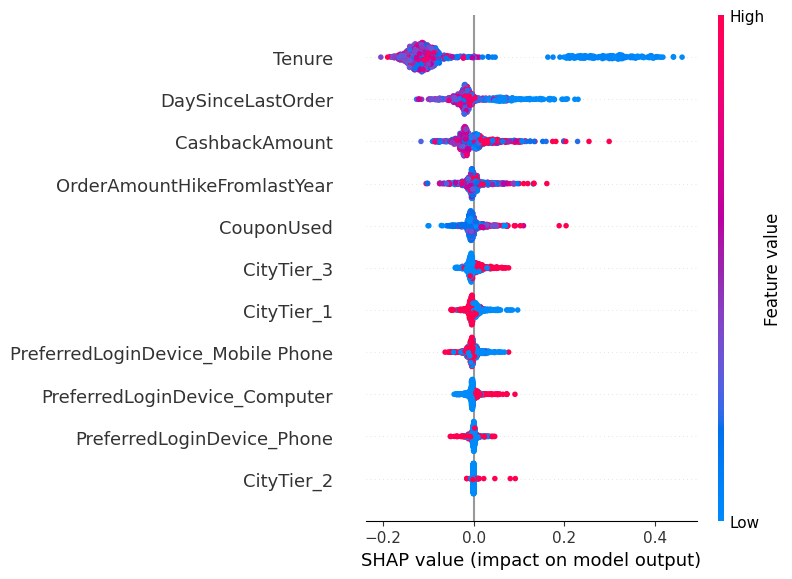

In [26]:
shap.summary_plot(shap_values[:, :, 1], X_test_preprocessed, max_display=None)



### Summary Plot for Each Class on the Whole Dataset


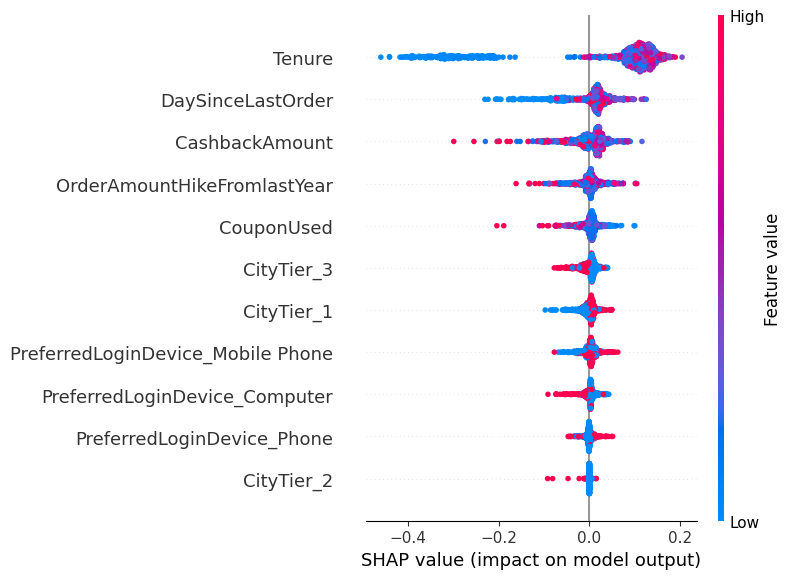

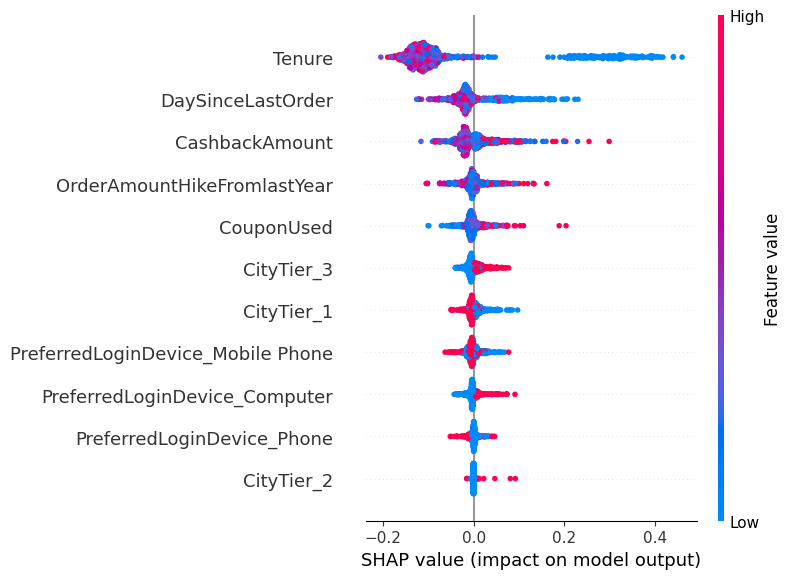

In [27]:
for i in range(2): 
    shap.summary_plot(shap_values[:, :, i], X_test_preprocessed, title=f"Class {i} SHAP Summary Plot")

### Waterfall Plot for a Specific Data Set Point

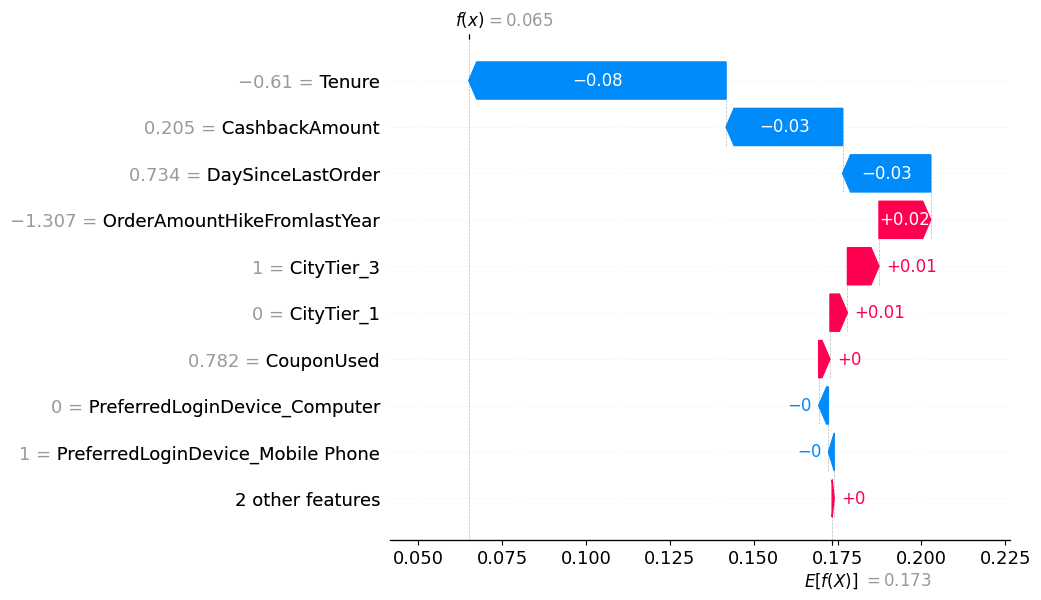

In [36]:
shap.plots.waterfall(shap_values[0, :, 1])


### Force Plots for a specific data set point

In [39]:
shap.plots.force(shap_values[0, :, 1])


### Mean SHAP plot

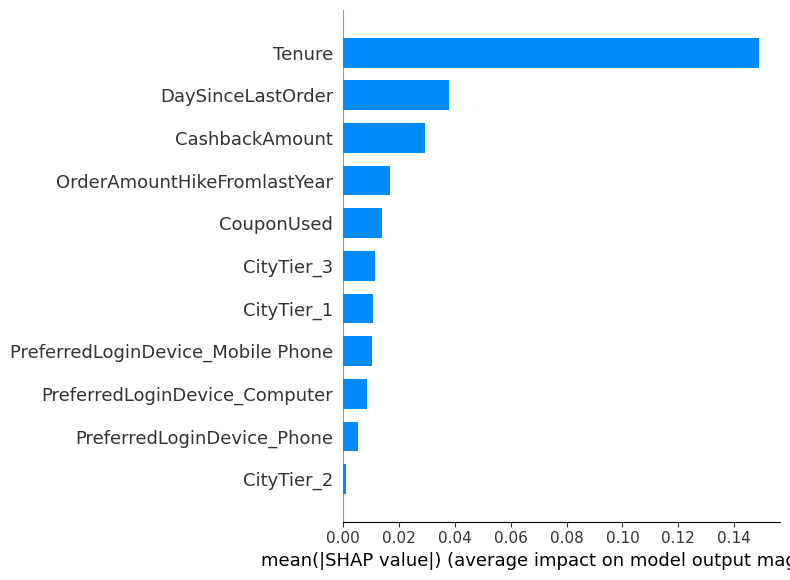

In [55]:
shap.summary_plot(shap_values[:, :, 1], X_test_preprocessed, plot_type="bar")


### Beeswarm plot 

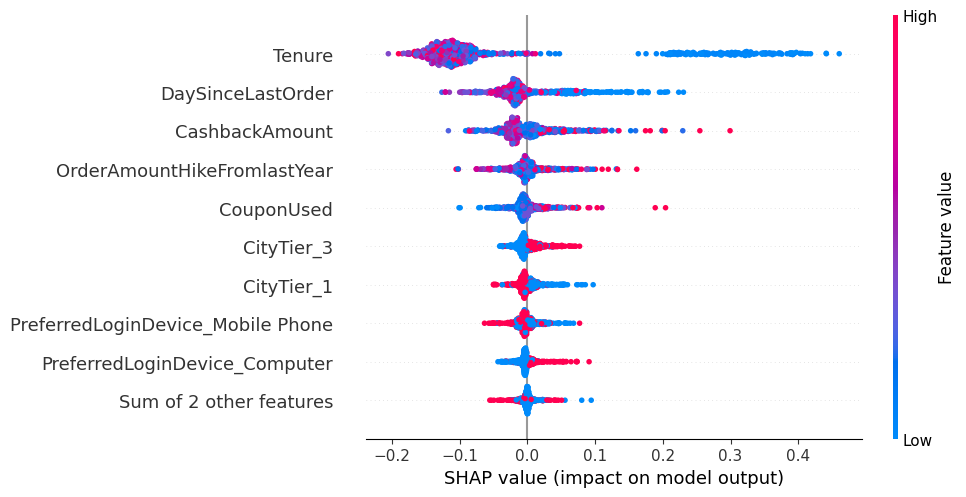

In [57]:
shap.plots.beeswarm(shap_values[:, :, 1])

### Dependence plot

In [ ]:
shap.dependence_plot("Tenure", shap_values[:,:,1], X_test_preprocessed, interaction_index=None)
